In [1]:
pets_by_zipcode = read.csv('zipcode_count_dg.csv')

In [2]:
colnames(pets_by_zipcode)

[1] "zipcode"                      "num_cats"                    
 [3] "num_dogs"                     "total_pets"                  
 [5] "cats_by_dog"                  "dogs_by_cat"                 
 [7] "dogs_minus_cat"               "total_population"            
 [9] "population_in_households"     "population_in_familes"       
[11] "population_in_group_qrtrs"    "population_density"          
[13] "diversity_index"              "median_household_income"     
[15] "average_household_income"     "per_capita_income"           
[17] "total_housing_units"          "owner_occupied_hu_num"       
[19] "owner_occupied_hu_percent"    "renter_occupied_hu_num"      
[21] "renter_occupied_hu_percent"   "vacant_housing_units_num"    
[23] "vacant_housing_units_percent" "median_home_value"           
[25] "average_home_value"           "total_households"            
[27] "average_household_size"       "family_households"           
[29] "average_family_size"          "lat"                         
[31] "lon"

In [3]:
more_than_10 = pets_by_zipcode[(pets_by_zipcode$total_pets >=10) & (pets_by_zipcode$num_cats >=1) & (pets_by_zipcode$num_dogs >=1),]

In [4]:
nrow(more_than_10)

[1] 33

In [5]:
library('ggplot2')
library('gridExtra')

Warning message:
"package 'gridExtra' was built under R version 3.5.2"

In [6]:
hist_cat = ggplot(more_than_10, aes(num_cats)) + geom_histogram(bins = 50) + geom_density()
qq_cat = ggplot(more_than_10, aes(sample = num_cats)) + geom_qq() + geom_qq_line()
hist_dog = ggplot(more_than_10, aes(num_dogs)) + geom_histogram(bins = 50) + geom_density()
qq_dog = ggplot(more_than_10, aes(sample = num_dogs)) + geom_qq() + geom_qq_line()
hist = ggplot(more_than_10, aes(dogs_minus_cat)) + geom_histogram(bins = 50) + geom_density()
qq = ggplot(more_than_10, aes(sample = dogs_minus_cat)) + geom_qq() + geom_qq_line()

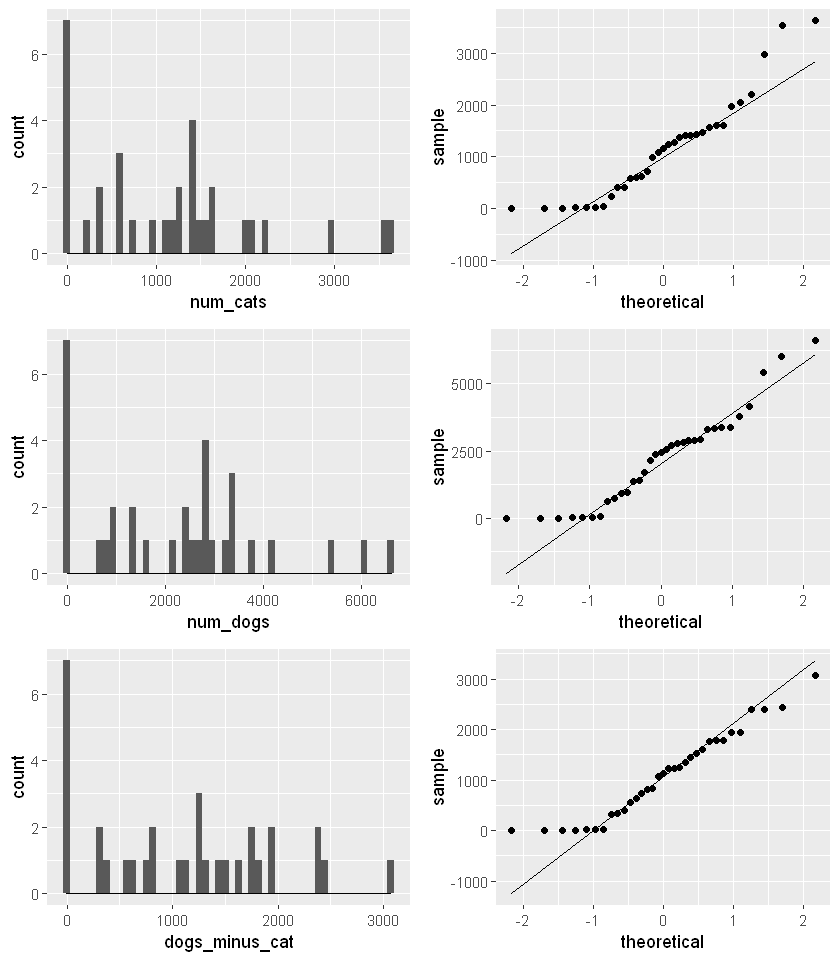

In [7]:
options(repr.plot.height = 8)
grid.arrange(hist_cat, qq_cat, hist_dog, qq_dog, hist, qq, ncol=2)

In [8]:
cat_box = ggplot(data = more_than_10, aes(y = num_cats)) + geom_boxplot()
dog_box = ggplot(data = more_than_10, aes(y = num_dogs)) + geom_boxplot()

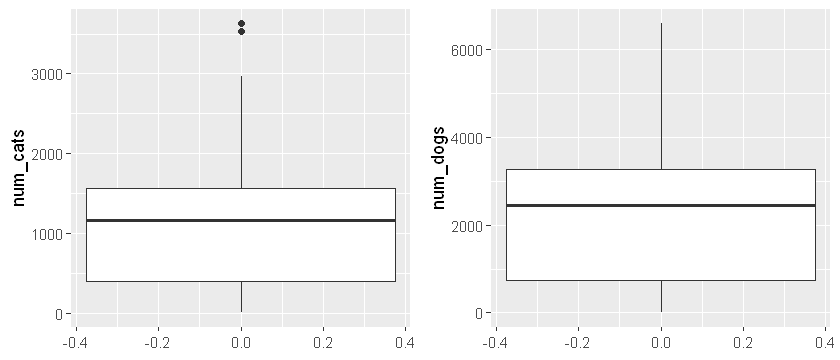

In [9]:
options(repr.plot.height = 3)
grid.arrange(cat_box, dog_box, ncol=2)

In [13]:
data.frame(var_cat = var(more_than_10$num_cats), var_dog = var(more_than_10$num_dogs))

var_cat,var_dog
967682.5,3159677


In [15]:
t.test(more_than_10$num_cats, more_than_10$num_dogs, paired = T)


	Paired t-test

data:  more_than_10$num_cats and more_than_10$num_dogs
t = -7.3586, df = 32, p-value = 2.28e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1395.3605  -790.3364
sample estimates:
mean of the differences 
              -1092.848 


In [16]:
population = ggplot(data = more_than_10, aes(total_population, dogs_by_cat)) + geom_point() + geom_smooth(method = 'lm')
income = ggplot(data = more_than_10, aes(median_household_income, dogs_by_cat)) + geom_point() + geom_smooth(method = 'lm')
diversity = ggplot(data = more_than_10, aes(diversity_index, dogs_by_cat)) + geom_point() + geom_smooth(method = 'lm')
home_value = ggplot(data = more_than_10, aes(median_home_value, dogs_by_cat)) + geom_point() + geom_smooth(method = 'lm')
owner_occ = ggplot(data = more_than_10, aes(owner_occupied_hu_percent, dogs_by_cat)) + geom_point() + geom_smooth(method = 'lm')
renter_occ = ggplot(data = more_than_10, aes(renter_occupied_hu_percent, dogs_by_cat)) + geom_point() + geom_smooth(method = 'lm')
lat = ggplot(data = more_than_10, aes(lat, dogs_by_cat)) + geom_point() + geom_smooth(method = 'lm')
lon = ggplot(data = more_than_10, aes(lon, dogs_by_cat)) + geom_point() + geom_smooth(method = 'lm')

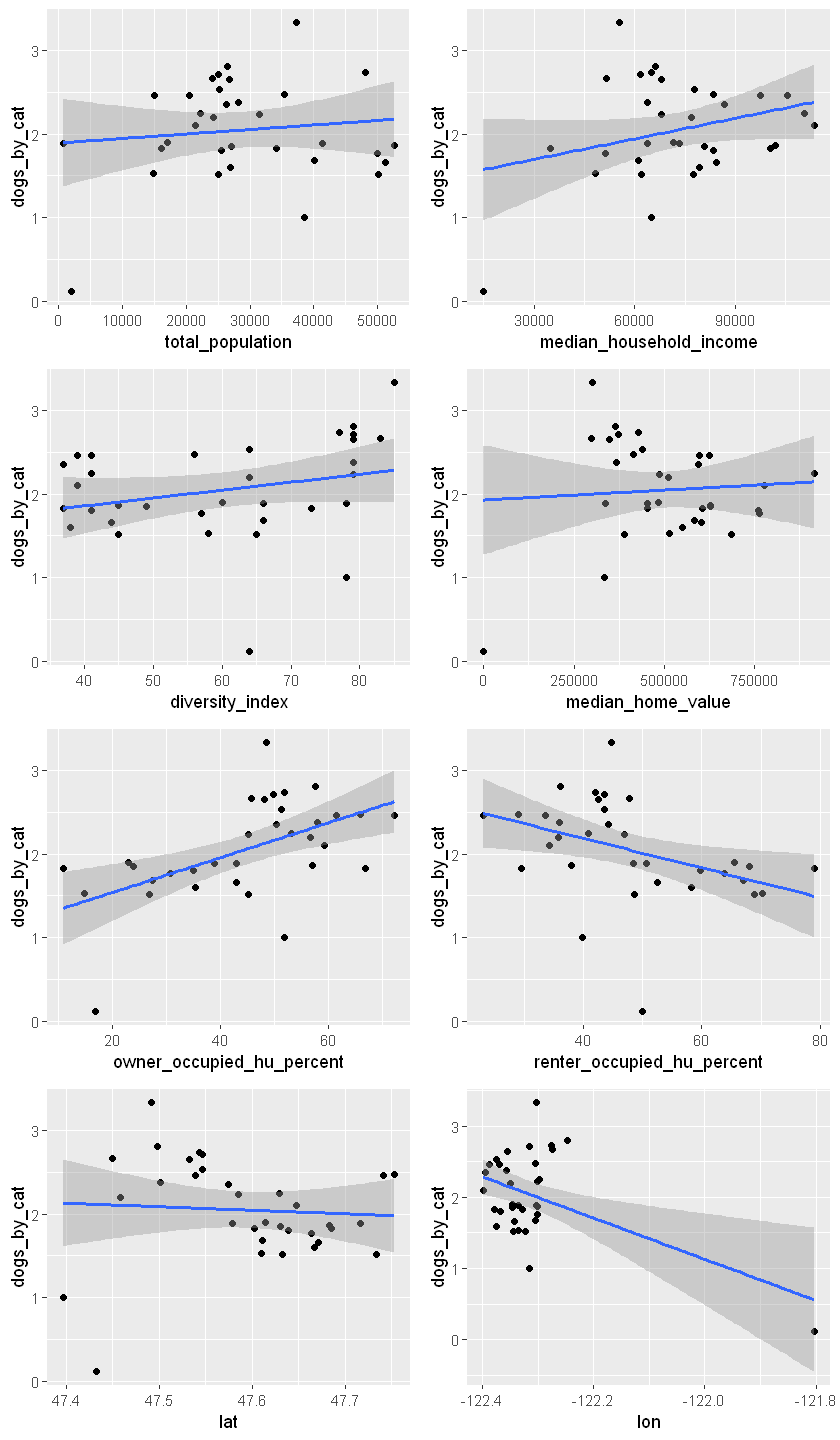

In [17]:
options(repr.plot.height = 12)
grid.arrange(population, income, diversity, home_value, owner_occ, renter_occ,lat, lon, ncol = 2)

In [18]:
model = lm(dogs_by_cat ~ lat + lon, data = more_than_10)
summary(model)


Call:
lm(formula = dogs_by_cat ~ lat + lon, data = more_than_10)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3966 -0.2920 -0.1054  0.3342  1.1490 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -341.6423   113.2029  -3.018  0.00515 **
lat           -1.8019     1.0702  -1.684  0.10263   
lon           -3.5110     0.9919  -3.540  0.00133 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5187 on 30 degrees of freedom
Multiple R-squared:  0.2976,	Adjusted R-squared:  0.2507 
F-statistic: 6.354 on 2 and 30 DF,  p-value: 0.005002


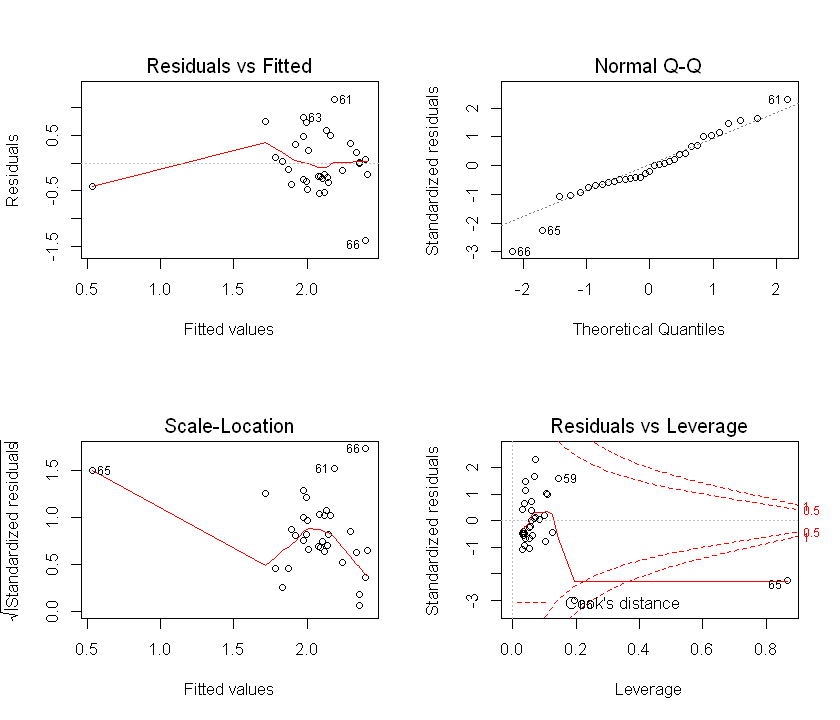

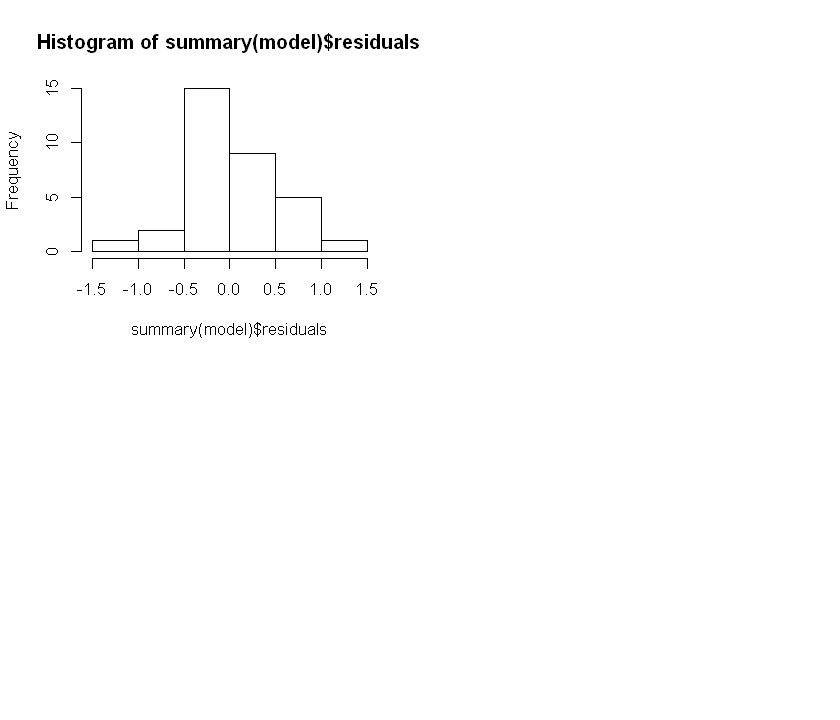

In [19]:
options(repr.plot.height = 6)
par(mfrow = c(2,2))
plot(model)

hist(summary(model)$residuals)

In [20]:
model = lm(dogs_by_cat ~ renter_occupied_hu_percent + owner_occupied_hu_percent, data = more_than_10)

In [21]:
summary(model)


Call:
lm(formula = dogs_by_cat ~ renter_occupied_hu_percent + owner_occupied_hu_percent, 
    data = more_than_10)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.10653 -0.25248  0.02231  0.28795  1.19423 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)   
(Intercept)                -2.79844    1.61274  -1.735  0.09297 . 
renter_occupied_hu_percent  0.04641    0.01885   2.462  0.01979 * 
owner_occupied_hu_percent   0.05903    0.01641   3.596  0.00114 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4732 on 30 degrees of freedom
Multiple R-squared:  0.4155,	Adjusted R-squared:  0.3765 
F-statistic: 10.66 on 2 and 30 DF,  p-value: 0.0003174


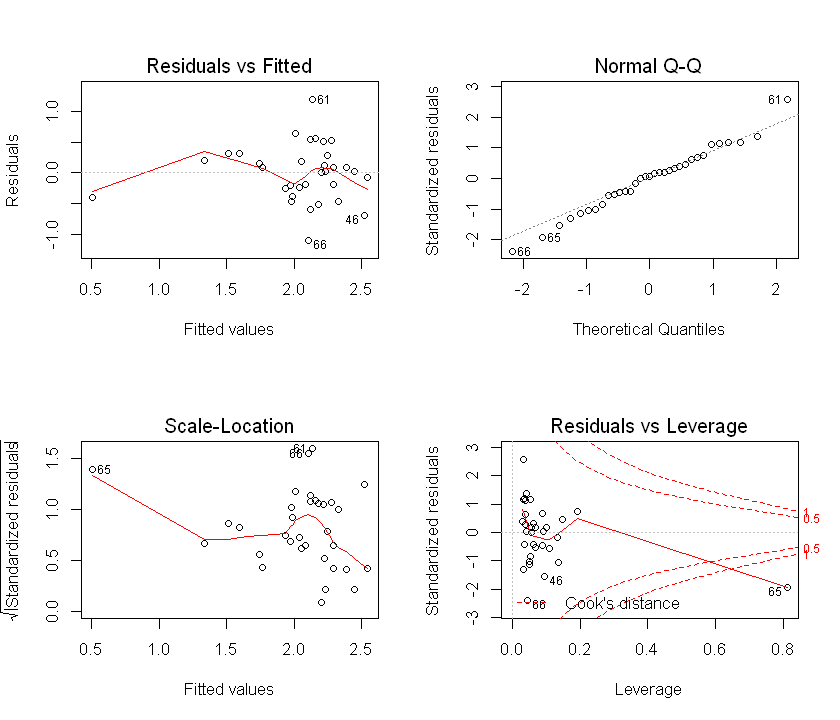

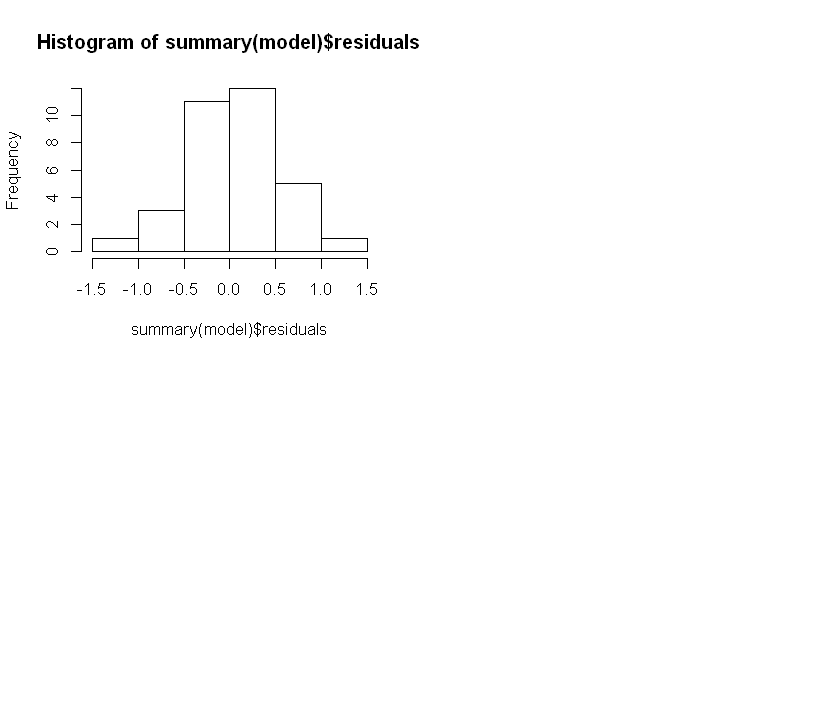

In [22]:
options(repr.plot.height = 6)
par(mfrow = c(2,2))
plot(model)

hist(summary(model)$residuals)